In [1]:
# from pathlib import Path
# import sys
# sys.path.append(str(Path().resolve().parent.parent))
import os
os.environ['OMP_NUM_THREADS'] = "1"
%env OMP_NUM_THREADS=1

env: OMP_NUM_THREADS=1


calculating p_ij
calculating fidelity
elapsed time:5.577130199992098


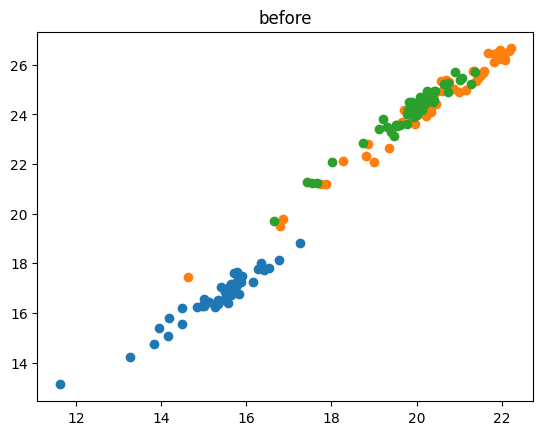

loss=1.007210401409325
loss=1.00820010269052
loss=1.0154856406852195
loss=1.0078739635753013
loss=1.0147095969860938
loss=1.0075064729310972
loss=1.015500917461502
loss=1.0079799806523284
loss=1.0144760778293023
loss=1.007539782364617
loss=1.015450739349587
loss=1.0080407479817395
loss=1.0160107586273668
loss=1.0079633729341193
loss=1.014766248626
loss=1.0092895868712732
loss=1.0171523148794277
loss=1.0072541714100034
loss=1.0134753063372228
loss=1.007749474003794
loss=1.0158816309737526
loss=1.0083784792454178
loss=1.015632919132917
loss=1.0082845986366644
loss=1.0162893454189863
loss=1.0071403840013333
loss=1.0146298811931438
loss=1.0061023704942915
loss=1.0132140603141226
loss=1.0060122390995707
loss=1.0135958365759077
loss=1.005688660063465
loss=1.0145643211690323
loss=1.0047028271538196
loss=1.0141569435957036
loss=1.0048612256838412
loss=1.0152846507856075
loss=1.003179663366725
loss=1.013116103999826
loss=1.0019352637809558
loss=1.0118046063442636
loss=1.0007598654658048
loss=1.

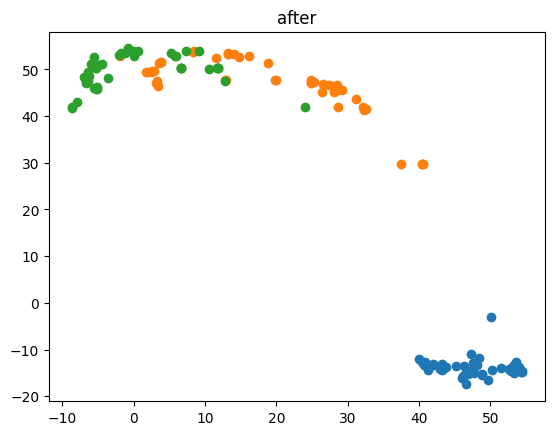

In [2]:
from qnn.new_kernel_tsne import quantum_kernel_tsne
import numpy as np
from quri_parts.circuit import H, CZ
from sklearn.datasets import load_iris, load_digits
from sklearn.preprocessing import MinMaxScaler
from circuit.circuit import LearningCircuit
from numpy.typing import NDArray

def create_quantum_circuit():
    qc = LearningCircuit(n_qubits)

    def preprocess_x(x: NDArray[np.float_], index: int) -> float:
        xa = x[index % len(x)]
        return min(1, max(-1, xa))

    for i in range(n_qubits):
        qc.add_gate(H(i))
    for d in range(depth):
        for i in range(n_qubits):
            qc.add_input_RY_gate(i, lambda x, i=i: preprocess_x(x, i))
        for i in range(n_qubits):
            qc.add_input_RX_gate(i, lambda x, i=i: preprocess_x(x, i))
        if d < depth - 1:
            for i in range(n_qubits):
                qc.add_gate(CZ(i, (i + 1) % n_qubits))
    return qc
X_train, y_train = load_iris(return_X_y=True)
# X_train = X_train / 16.
# X_train = X_train[:200]
# y_train = y_train[:200] #500 => fidelity 81.6[s]
scaler = MinMaxScaler((0, np.pi / 2))
n_qubits = 12
depth = 1

X_train = scaler.fit_transform(X_train)
qk_tsne = quantum_kernel_tsne(max_iter=4000)
qk_tsne.init(create_quantum_circuit, [])
qk_tsne.train(X_train, y_train, method="COBYLA")
